In [1]:
from imports import *
import staircase as sc
%matplotlib inline
import operator
import warnings
from hotstepper.Utils import Utils
import hotstepper.fastbase as fb
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"../data/hotel_stays.csv", parse_dates=['check_in', 'check_out'], dayfirst=True)

#df = df_cc.loc[df_cc.call_type == 'Type 1']

df.shape

(13602, 6)

In [3]:
#%%timeit -r 3 -n 3
hotel_stays = Steps.read_dataframe(df,'check_in', 'check_out')
#aborted_type1 = Steps.read_dataframe(df,'arrived','aborted')
#duration_type1 = Steps.read_dataframe(df,'answered','complete')

In [4]:
queue = sc.Stairs(use_dates=True).layer(df.check_in, df.check_out)

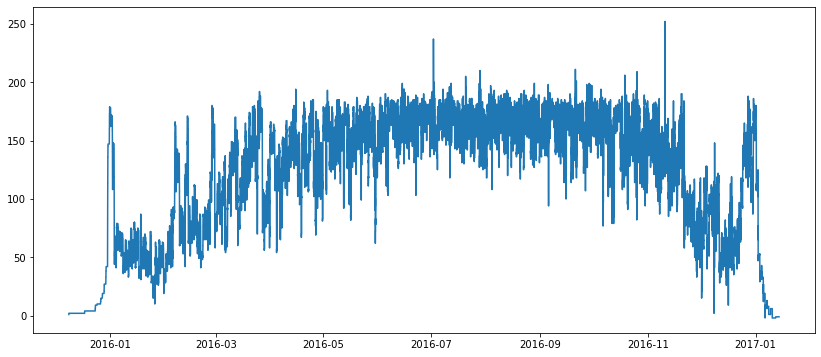

In [5]:
st = np.array([[s._start_ts,s._direction,s._weight] for s in hotel_stays],dtype=float)
p = hotel_stays.step_keys()
fig,ax = plt.subplots(figsize=(14,6))
t = np.asarray(list(map(Utils.get_ts, p)))
x = np.asarray(fb.fast_steps_heaviside().step(st,t,1))
#x2 = np.asarray(fb.fast_steps_logit().step(st,t,500000))
ax.step(p,x)
#ax.step(p,x2,color='r')

<AxesSubplot:label='6aaba2dc-4331-4243-8a24-ade893de3a11'>

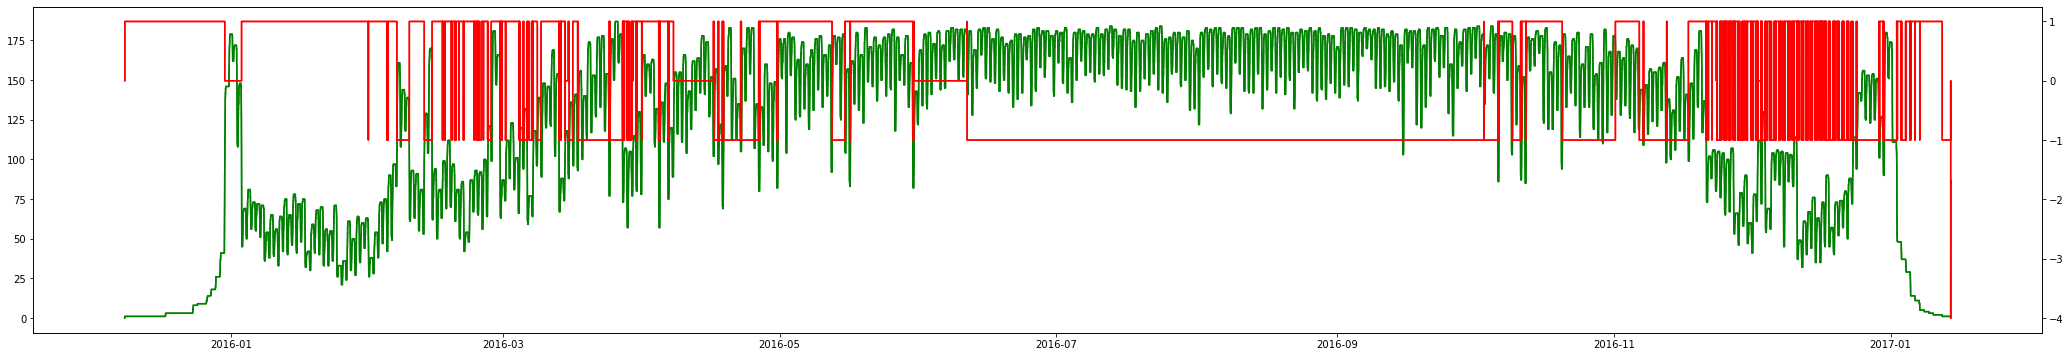

In [9]:
timespan = {'lbound':pd.Timestamp(2020,2,15,10),'ubound':pd.Timestamp(2020,2,16)}
ax = hotel_stays.plot(color='g',size=(36,6))
hotel125 = (hotel_stays<100)
#hotel125.plot(ax=ax,color='r')

#ax2 = (hotel_stays>80).plot(color='g')
hotel125.normalise().plot(ax=ax.twinx(),color='r')

#aborted_type1.plot(ax=ax,color='r')
#duration_type1.plot(ax=ax,color='blue')

In [ ]:
#p = hotel_stays.step_keys()
p=np.arange(pd.Timestamp(2016,1,1),pd.Timestamp(2017,1,1),pd.Timedelta(minutes=20)).astype(pd.Timestamp)

In [ ]:
%%timeit -r 3 -n 3
st = np.array([[s._start_ts,s._direction,s._weight] for s in hotel_stays],dtype=float)
t = np.asarray(list(map(Utils.get_ts, p)))
x = np.asarray(fb.fast_steps_heaviside().step(st,t,1))

In [ ]:
%%timeit -r 3 -n 3
st = np.array([[s._start_ts,s._direction,s._weight] for s in hotel_stays],dtype=float)
t = np.asarray(list(map(Utils.get_ts, p)))
x2 = np.asarray(fb.fast_steps_logit().step(st,t,500))

In [ ]:
%%timeit -r 3 -n 3
queue(p)